In [11]:
# instalar librerias
!pip install pandas
!pip install openpyxl



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# importar matplotlib
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
# leer el archivo csv
df_population_raw = pd.read_csv('population_total.csv')
# mostrar el dataframe
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


# 1. Hacer una tabla pivote

.pivot(): Devuelve un dataframe reformado que esta organizado por cierto index/valores de columnas ("tabla pivote sin funciones agregadas)

In [14]:
# eliminar valores nulos -> se hace con el siguiente metodo: dropna
df_population_raw.dropna(inplace=True)

In [15]:
# hacer tabla pivote
# La poblacion es la unica data del dataframe
df_pivot = df_population_raw.pivot(index='year', 
                                    columns='country',
                                    values='population')

In [16]:
# seleccionar algunos paises
df_pivot = df_pivot[['Argentina', 'Brazil', 'United States', 'Indonesia', 'China']]

In [17]:
# mostrar tabla pivote
df_pivot

# Se forma una tabla en donde muestra como fue evolucionando 
# la poblacion de cada pais a traves de los años

country,Argentina,Brazil,United States,Indonesia,China
year,,,,,
1955.0,18789418.0,62533919.0,171685336.0,77273425.0,6.122416e+08
1960.0,20481779.0,72179226.0,186720571.0,87751068.0,6.604081e+08
1965.0,22159650.0,83373530.0,199733676.0,100267062.0,7.242190e+08
1970.0,23880561.0,95113265.0,209513341.0,114793178.0,8.276014e+08
1975.0,25865776.0,107216205.0,219081251.0,130680727.0,9.262409e+08
1980.0,27896528.0,120694009.0,229476354.0,147447836.0,1.000089e+09
1985.0,30216279.0,135274080.0,240499825.0,164982451.0,1.075589e+09
1990.0,32618651.0,149003223.0,252120309.0,181413402.0,1.176884e+09
1995.0,34828170.0,162019896.0,265163745.0,196934260.0,1.240921e+09


# 2. Lineplot (Grafico de linea)

In [18]:
#Exportar la tabla a excel
df_pivot.to_excel('evolucion_poblacion.xlsx')

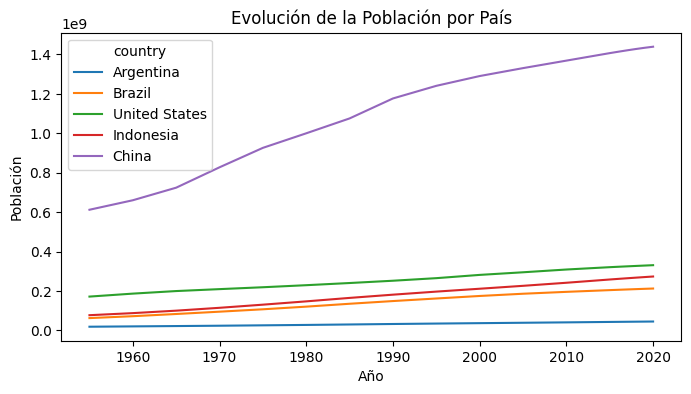

In [19]:
df_pivot.plot(kind='line', xlabel='Año', ylabel='Población', title='Evolución de la Población por País', figsize=(8, 4))

# figsize=(8, 4) primero eje x y despues eje y

# guardar figura
plt.savefig('evolucion_poblacion.png')

# mostrar plot
plt.show()

## Barplot (Grafico de caja)

### Barplot Separados

In [20]:
#Seleccionando solo un año (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [21]:
# mostrando un dataframe
df_pivot_2020

country,Argentina,Brazil,United States,Indonesia,China
year,,,,,
2020.0,45195774.0,212559417.0,331002651.0,273523615.0,1.439324e+09


In [22]:
# Transponer un dataframe (cambiando filas con columnas)
# Esto se hace porque cuando se arma un grafico de barras se necesita la data textual (los paises) esten en los index y la parte numerica en las columnas
df_pivot_2020 = df_pivot_2020.T

<Axes: title={'center': 'Población por País en 2020'}, xlabel='País', ylabel='Población'>

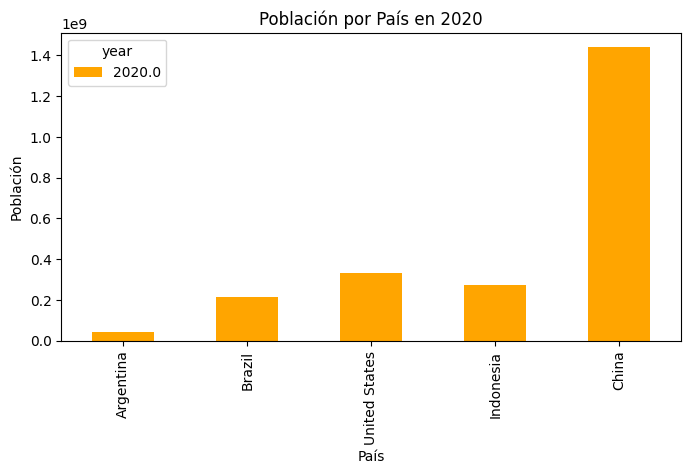

In [23]:
# Hacer el barplot
df_pivot_2020.plot(kind='bar', color='orange', xlabel='País', ylabel='Población', title='Población por País en 2020', figsize=(8, 4))


### Barplot agrupado por “n” variables

In [24]:
# seleccionar unos años
df_pivot_sample = df_pivot[df_pivot.index.isin([1980,1990,2000,2010,2020])]

<Axes: title={'center': 'Población por País en Años Seleccionados'}, xlabel='Año', ylabel='Población'>

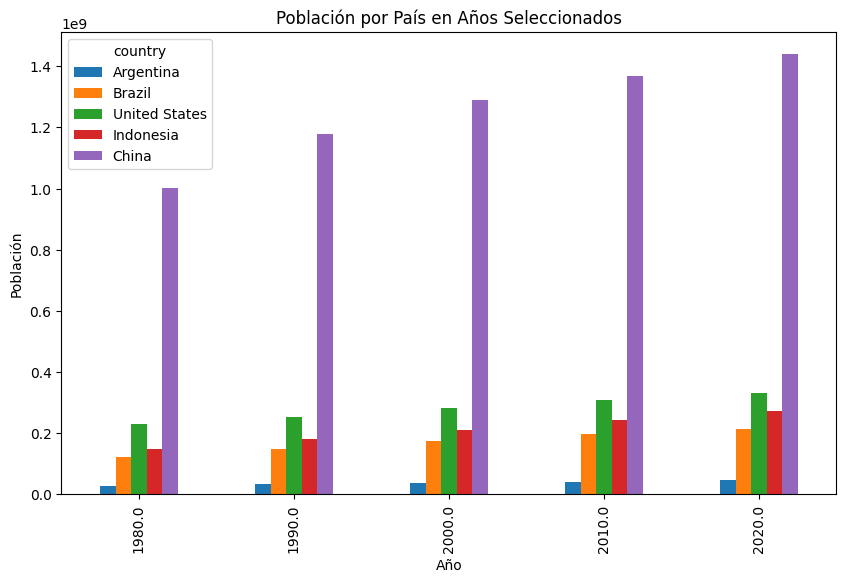

In [25]:
# haciendo barplot agrupados
df_pivot_sample.plot(kind='bar', xlabel='Año', ylabel='Población', title='Población por País en Años Seleccionados', figsize=(10, 6))

## Piechart

In [26]:
# cambiando el nombre de columna
df_pivot_2020.rename(columns={2020:'2020'}, inplace=True)

<Axes: title={'center': 'Población por País en 2020'}, ylabel='2020'>

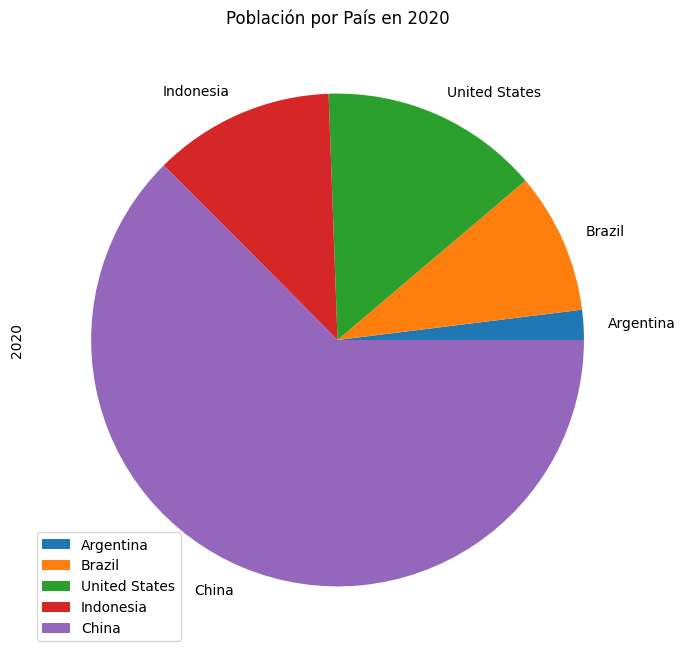

In [27]:
# haciendo el piechart
df_pivot_2020.plot(kind='pie', y='2020', title='Población por País en 2020', figsize=(8, 8))


## Boxplot

Gráfica de cajas. Un boxplot es una gráfica que muestra como la data esta distribuida. En un boxplot podemos ver cinco datos importantes:
1. Valor mínimo de la data
2. Primer cuartil (Q1)
3. Mediana
4. Tercer cuartil (Q3)
5. Valor máximo de la data

### Boxplot

<Axes: title={'center': 'Distribución de la Población en Estados Unidos'}, ylabel='Población'>

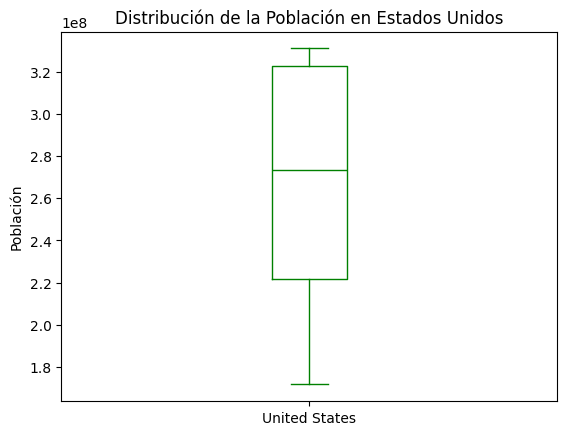

In [28]:
df_pivot['United States'].plot(kind='box', color='green', ylabel='Población', title='Distribución de la Población en Estados Unidos')

### Multiples Boxplot

<Axes: title={'center': 'Distribución de la Población por País'}, xlabel='País', ylabel='Población'>

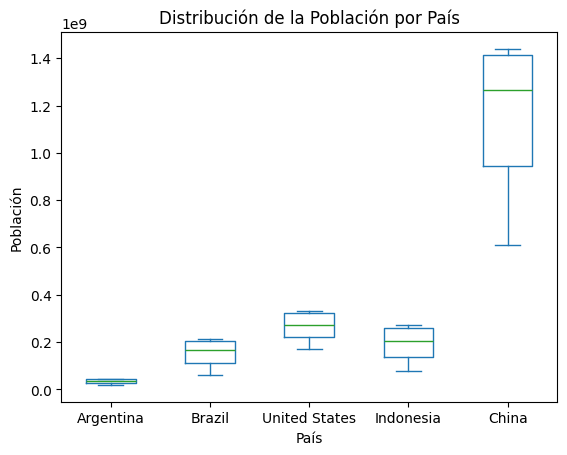

In [29]:
df_pivot.plot(kind='box', xlabel='País', ylabel='Población', title='Distribución de la Población por País')

## Histograma

Un histograma es una gráfica que organiza un grupo de datos en rangos especificos. Estos rangos son representados graficamente como barras verticales y representan a una distribución de frecuencias de un conjunto de datos.

<Axes: ylabel='Frequency'>

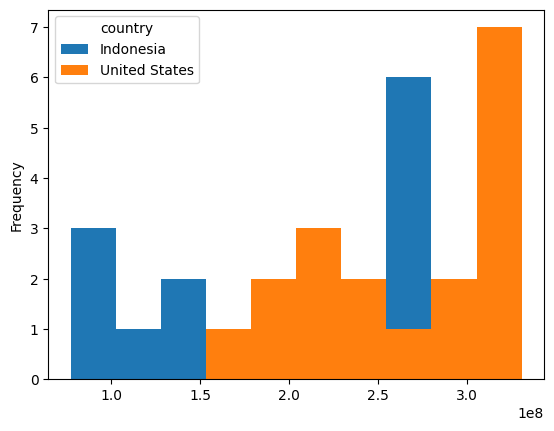

In [30]:
df_pivot[['Indonesia', 'United States']].plot(kind='hist')

## ScatterPlot (Grafico de dispersion)

También conocido como gráfico de dispersión. Es usado para graficar los puntos de datos en los ejes horizontales y verticales para mostrar como una variable afecta a la otra.
Por ejemplo, graficar la población vs el año y se podría ver como el año afecta a la evolución de la población.

In [31]:
# seleccionar una muestra de la data
df_sample=df_population_raw[df_population_raw['country'].isin(['United States', 'India', 'China', 'Indonesia', 'Brazil'])]

<Axes: xlabel='year', ylabel='population'>

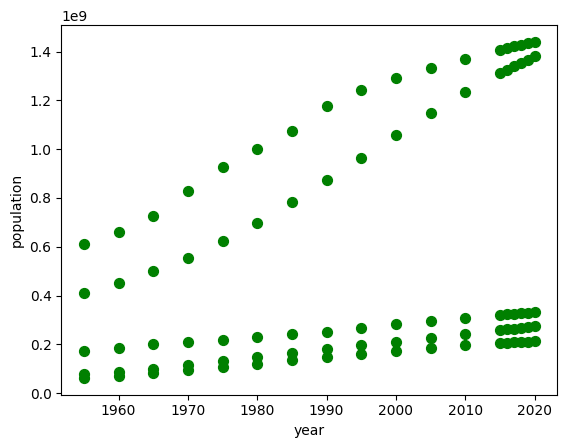

In [32]:
# haciendo el plot
df_sample.plot(kind='scatter', 
               x='year', 
               y='population',
               s=50,
               color='green')

---

# Visualización interactiva de datos

In [33]:
!pip install plotly
!pip install matplotlib
!pip install cufflinks


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import plotly.express as px
import cufflinks as cf 
from IPython.display import display, HTML


cf.set_config_file(offline=True, sharing='public', theme='ggplot')

In [42]:
df_population = pd.read_csv('population_total.csv')
df_population = df_population.dropna()
df_population = df_population.pivot(index='year', columns='country',
                                    values='population')
df_population = df_population[['United States', 'India', 'China', 
                               'Indonesia', 'Brazil']]
df_population

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


## Lineplot

In [45]:
df_long = (
    df_population
    .reset_index()
    .melt(
        id_vars='year',
        var_name='country',
        value_name='population'
    )
)
fig = px.line(
    df_long,
    x='year',
    y='population',
    color='country',
    title='Population Growth (1955–2020)',
    labels={
        'year': 'Year',
        'population': 'Population',
        'country': 'Country'
    }
)

fig.show()

## Barplot (Grafico de Barra)
### Barplot

In [47]:
df_population_2020 = df_population[df_population.index.isin([2020])]
df_population_2020 = df_population_2020.T
df_bar = df_population_2020.reset_index()
df_bar.columns = ['country', 'population']

fig = px.bar(
    df_bar,
    x='country',
    y='population',
    title='Population in 2020',
    labels={
        'country': 'Country',
        'population': 'Population'
    },
    color_discrete_sequence=['lightgreen']
)

fig.show()

### Barplot agrupado por “n” variables

In [50]:
df_population_sample = df_population[df_population.index.isin([1980, 1990, 2000, 2010, 2020])]

df_long = (
    df_population_sample
    .reset_index()
    .melt(
        id_vars='year',
        var_name='country',
        value_name='population'
    )
)

fig = px.bar(
    df_long,
    x='year',
    y='population',
    color='country',
    barmode='group',
    title='Population by Country',
    labels={
        'year': 'Years',
        'population': 'Population'
    }
)

fig.show()

## Boxplot (Grafico de caja)
### Boxplot

In [51]:
df_us = df_population[['United States']].reset_index()
df_us.columns = ['year', 'population']

fig = px.box(df_us, y='population', title='Population Distribution – United States')

fig.update_traces(marker_color='green')

fig.update_layout(
    yaxis_title='Population'
)

fig.show()

### Multiples Boxplots

In [52]:
df_long = (
    df_population
    .reset_index()
    .melt(
        id_vars='year',
        var_name='country',
        value_name='population'
    )
)
fig = px.box(
    df_long,
    x='country',
    y='population',
    title='Population Distribution by Country'
)

fig.update_layout(
    xaxis_title='Countries',
    yaxis_title='Population'
)

fig.show()


## Histograma

In [ ]:
df_long = (
    df_population[['United States', 'Indonesia']]
    .reset_index()
    .melt(
        id_vars='year',
        var_name='country',
        value_name='population'
    )
)

fig = px.histogram(
    df_long,
    x='population',
    color='country',
    barmode='overlay',
    opacity=0.6,
    title='Population Distribution: United States vs Indonesia',
    labels={
        'population': 'Population',
        'country': 'Country'
    }
)

fig.show()


## Piechart

In [62]:
# transformando data
df_population_2020 = df_population_2020.reset_index()
df_population_2020 = df_population_2020.rename(columns={2020:'2020'})

# haciendo el plot
df_population_2020.iplot(kind='pie', labels='country',
                         values='2020',
                         title='Population in 2020 (%)')

## ScatterPlot (Grafico de dispersion)

In [63]:

df_long = (
    df_population
    .reset_index()
    .melt(
        id_vars='year',
        var_name='country',
        value_name='population'
    )
)

fig = px.scatter(
    df_long,
    x='year',
    y='population',
    color='country',
    title='Population Over Time',
    labels={
        'year': 'Year',
        'population': 'Population',
        'country': 'Country'
    }
)

fig.show()
